<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [691]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [692]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [693]:
import pyupbit

In [694]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-iq", interval="minute60")
df

,open,high,low,close,volume,value
2022-09-10 16:00:00,7.40,7.41,7.34,7.36,1.385370e+07,1.021807e+08
2022-09-10 17:00:00,7.36,7.39,7.34,7.34,8.293200e+06,6.106206e+07
2022-09-10 18:00:00,7.34,7.37,7.34,7.36,4.236347e+06,3.114464e+07
2022-09-10 19:00:00,7.35,7.38,7.33,7.33,7.364833e+06,5.411797e+07
2022-09-10 20:00:00,7.33,7.38,7.33,7.36,5.541619e+06,4.073721e+07
...,...,...,...,...,...,...
2022-09-18 19:00:00,8.08,8.22,8.01,8.14,3.376219e+08,2.742100e+09
2022-09-18 20:00:00,8.15,8.16,8.06,8.07,1.019305e+08,8.260267e+08
2022-09-18 21:00:00,8.08,8.11,7.98,8.05,2.201904e+08,1.772842e+09
2022-09-18 22:00:00,8.05,8.13,8.03,8.06,1.178470e+08,9.525209e+08


In [695]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-09-10 16:00:00,7.36
1,2022-09-10 17:00:00,7.34
2,2022-09-10 18:00:00,7.36
3,2022-09-10 19:00:00,7.33
4,2022-09-10 20:00:00,7.36
...,...,...
195,2022-09-18 19:00:00,8.14
196,2022-09-18 20:00:00,8.07
197,2022-09-18 21:00:00,8.05
198,2022-09-18 22:00:00,8.06


In [696]:
#prophet 불러옴
from fbprophet import Prophet

In [697]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [698]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=30, freq='H')
forecast = model.predict(future)

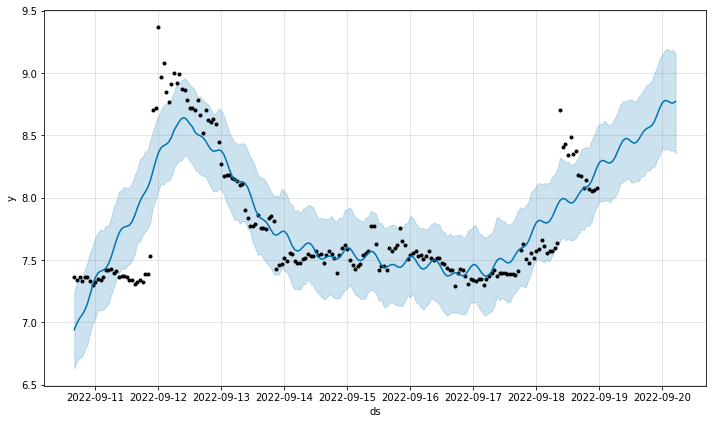

In [699]:
#그래프1
fig1 = model.plot(forecast)

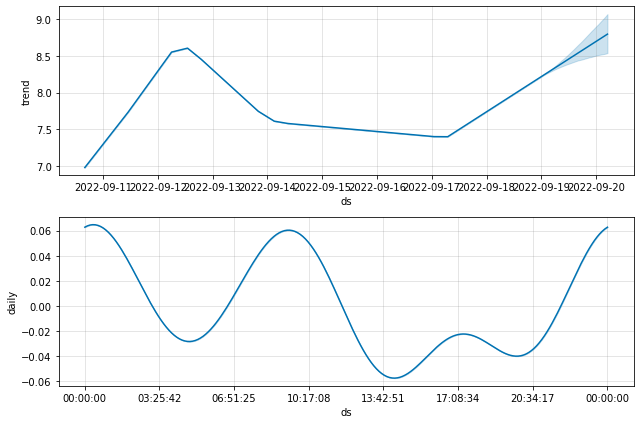

In [700]:
 #그래프2
fig2 = model.plot_components(forecast)